All points within control limits.


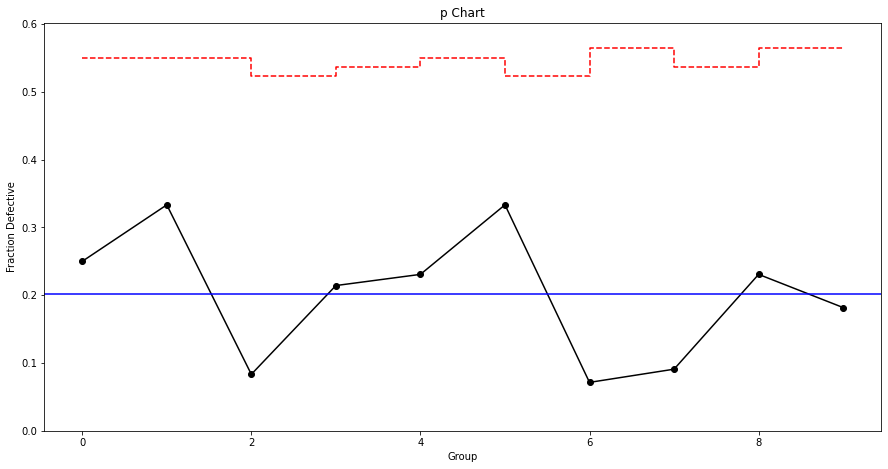

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Example Data 생성
p = {'defects':np.random.randint(1,5,10).tolist(),
    'group_size':np.random.randint(10,15,10).tolist()}
    
# Convert data to data frame
p = pd.DataFrame(p)

# Add 'p' column to data frame
p['p'] = p['defects']/p['group_size']

# Plot p-chart
plt.figure(figsize=(15,7.5))
plt.plot(p['p'], linestyle='-', marker='o', color='black')
plt.step(x=range(0,len(p['p'])), y=statistics.mean(p['p'])+3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/(p['group_size']))), color='red', linestyle='dashed')
plt.step(x=range(0,len(p['p'])), y=statistics.mean(p['p'])-3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/(p['group_size']))), color='red', linestyle='dashed')
plt.axhline(statistics.mean(p['p']), color='blue')
plt.ylim(bottom=0)
plt.title('p Chart')
plt.xlabel('Group')
plt.ylabel('Fraction Defective')

# Validate points out of control limits
i = 0
control = True
for group in p['p']:
    if group > (statistics.mean(p['p'])+3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/statistics.mean(p['group_size'])))) or group < (statistics.mean(p['p'])-3*(np.sqrt((statistics.mean(p['p'])*(1-statistics.mean(p['p'])))/statistics.mean(p['group_size'])))):
        print('Group', i, 'out of fraction defective cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')